## SBDS_Capstone_Proejct_1 - Predict Adults with 50K Income - Data Wrangling

This capstone project is based on dataset called ‘Adult Data Set’ from UCI’s Machine Learning Repository.
This project aims to solve following problems:
1.	Predict whether a person’s income exceed $50K/yr based on the census data
2.	Identify various segments which may exist in the population based on the data collected

a.	As in any good data analysis project, I first plan to do a good deal of EDA (Exploratory Data Analysis) of the dataset. The objective is to thoroughly understand the data and then based on that prepare the data analysis plan/framework.

b.	Based on the EDA, I will identify the key hypothesis which should answer following questions
- Overall income distribution of the population
- Which attributes may have greater influence on determining the income threshold of 50K/yr
- Any other interesting facts



Initial Data Cleanup

The original data is in .data format. This was first converted to .txt, and then to .csv to make it easily readable by Panda

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# I will first load data for US Geo and do an EDA for the same
adult = pd.read_csv('adult_csv.csv')

In [4]:
adult.shape

(32561, 15)

In [5]:
adult.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
adult.tail()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [7]:
adult.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [8]:
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


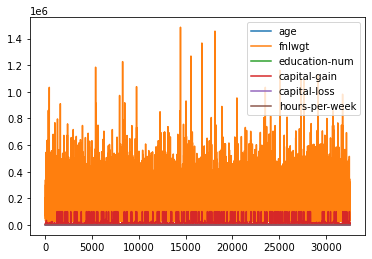

In [9]:
adult.plot()

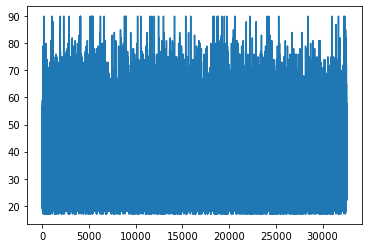

In [10]:
adult.age.plot()

In [11]:
adult['native-country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [21]:
native = adult['native-country'].value_counts()
print(native)

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [13]:
adult.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


### Missing Values? 

There are no missing values, except native-country columns which has 582 entries with value '?' - for these entries, native-country was probably not known. Considering that the count is quite small compared to the total count (32561), I decided to leave it unchanged so that it can be identified as it's own category in the later statistical analysis. If required, I can drop these rows later in the EDA and Data Story part of the project.

Outliers:
There are not outliers in the data based on describe methods results

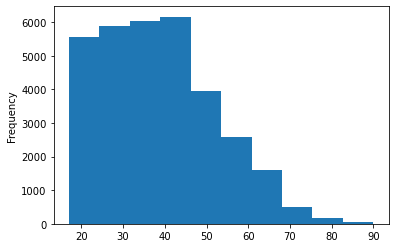

In [14]:
adult.age.plot(kind='hist')

In [15]:
adult['education-num'].unique()

array([13,  9,  7, 14,  5, 10, 12, 11,  4, 16, 15,  3,  6,  2,  1,  8])

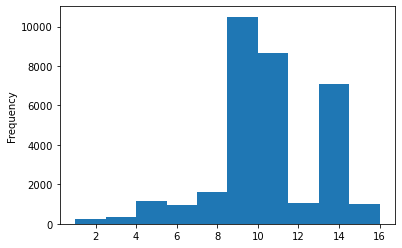

In [16]:
adult['education-num'].plot(kind='hist')

In [ ]:
adult.age.plot(kind='hist')

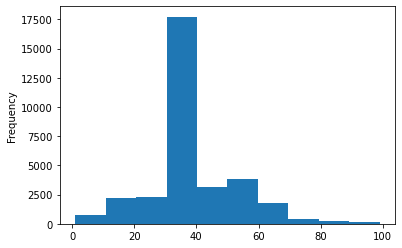

In [17]:
adult['hours-per-week'].plot(kind='hist')

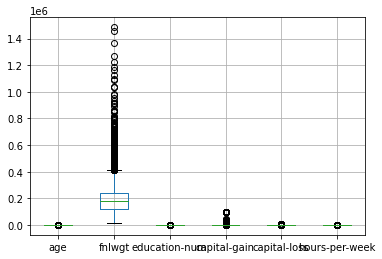

In [24]:
adult.boxplot()

The above box-plot cannot be used for EDA since the data is not normalized and as a result Box-plot cannot be displayed in a useful way. I will plot individual columns against each other to get more interpretable results of box-plots.

Also the column
'fnlwgt' values are not real numbers instead they are more of identification values (and hence of no use for quantitative data analysis). I plan to drop this column later in the EDA & Data Story part of the project.

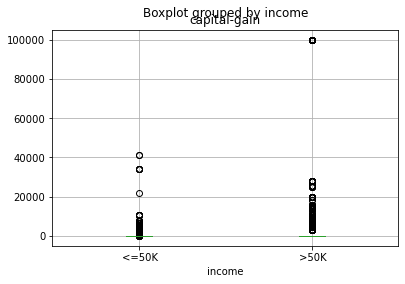

In [23]:
adult.boxplot(column='capital-gain', by='income')

### Outliers?

The capital gain figure of $100000 may appear to be an outlier but it is quite possible to have that much income for some individuals. Similarly, there are a few outliers in the <=50k income group, but they also fall into the category of valid data/values.

As they say not all outliers are bad data points. Some can be an error, but others are valid values.

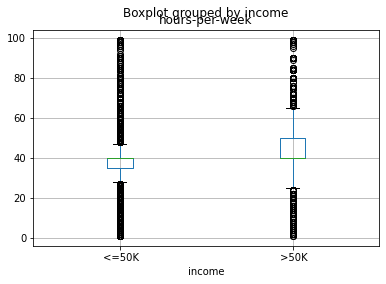

In [25]:
adult.boxplot(column='hours-per-week', by='income')

The >50K income group clearly has people who are clocking many more hours than people from <=50K income group. The average # of hours are more than 40 hours in high income group vs. an average of less than 40 hours in low income group

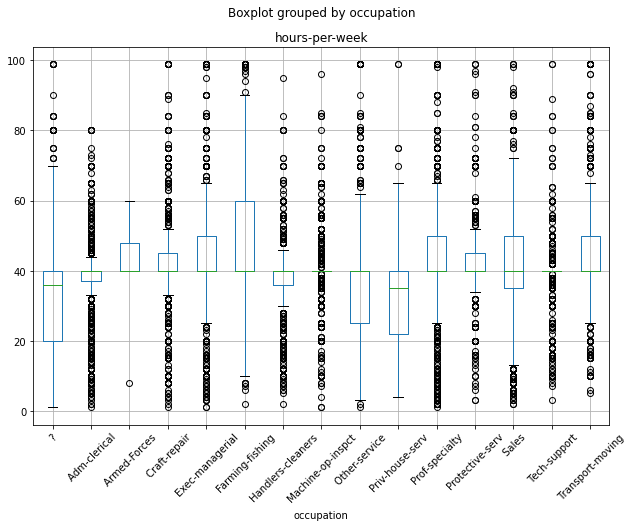

In [42]:
adult.boxplot(column='hours-per-week', by='occupation', figsize=(10,7), rot=45)